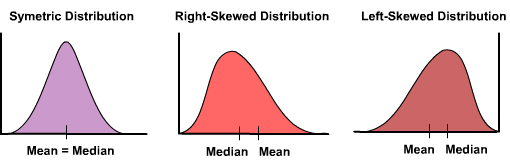

**A data is said to be skewed when the plot does not tend to have the shape of a bell curve, or there is no symmetry in the shape of the curve. In a normal distribution, the central tendencies such as mean, median and mode are closer to one another. On the other hand, a skewed data has a pattern where these central tendencies are not close enough. Transformations are inevitable when this is the case.**

**One of the assumptions for applying Regression is for the data to follow a normal distribution. But most of the times,the numerical features don't follow a normal distribution. In other words, the features tend to be skewed. Applying transformations on linear models may result in better results but not necessarily on non-linear models. CART models can benefit from this because they tend to use analysis of variance to perform the splits,and variance is very sensible to outliers and skewed data, this is the reason why transforming can considerably improve the model accuracy.**

**Certain techniques can be followed to bring the skewed data to a normal(Gaussian Distribution). Some of them are:**

* Log Transformation
* Reciprocal Transformation
* Exponential Transformation
* Square root Transformation
* Cube root Transformation
* Boxcox transformation 

These techniques have been applied in this notebook and the change caused by the transformation is displayed.

### **Dataset Description**

World Bank - World Development Indicators: Health Systems
This is a digest of the information described at http://wdi.worldbank.org/table/2.12# It describes various health spending per capita by Country, as well as doctors, nurses and midwives, and specialist surgical staff per capita

Content
Notes, explanations, etc.

There are countries/regions in the World Bank data not in the Covid-19 data, and countries/regions in the Covid-19 data with no World Bank data. This is unavoidable.
There were political decisions made in both datasets that may cause problems. I chose to go forward with the data as presented, and did not attempt to modify the decisions made by the dataset creators (e.g., the names of countries, what is and is not a country, etc.).
Columns are as follows:

Country_Region: the region as used in Kaggle Covid-19 spread data challenges.

Province_State: the region as used in Kaggle Covid-19 spread data challenges.

WorldBankName: the name of the country used by the World Bank

HealthexppctGDP2016: Level of current health expenditure expressed as a percentage of GDP. Estimates of current health expenditures include healthcare goods and services consumed during each year. This indicator does not include capital health expenditures such as buildings, machinery, IT and stocks of vaccines for emergency or outbreaks.

Healthexppublicpct2016: Share of current health expenditures funded from domestic public sources for health. Domestic public sources include domestic revenue as internal transfers and grants, transfers, subsidies to voluntary health insurance beneficiaries, non-profit institutions serving households (NPISH) or enterprise financing schemes as well as compulsory prepayment and social health insurance contributions. They do not include external resources spent by governments on health.

Healthexpoutofpocketpct2016: Share of out-of-pocket payments of total current health expenditures. Out-of-pocket payments are spending on health directly out-of-pocket by households.

HealthexppercapitaUSD_2016: Current expenditures on health per capita in current US dollars. Estimates of current health expenditures include healthcare goods and services consumed during each year.

percapitaexpPPP2016: Current expenditures on health per capita expressed in international dollars at purchasing power parity (PPP).

Externalhealthexppct2016: Share of current health expenditures funded from external sources. External sources compose of direct foreign transfers and foreign transfers distributed by government encompassing all financial inflows into the national health system from outside the country. External sources either flow through the government scheme or are channeled through non-governmental organizations or other schemes.

Physiciansper1000_2009-18: Physicians include generalist and specialist medical practitioners.

Nursemidwifeper10002009-18: Nurses and midwives include professional nurses, professional midwives, auxiliary nurses, auxiliary midwives, enrolled nurses, enrolled midwives and other associated personnel, such as dental nurses and primary care nurses.

Specialistsurgicalper10002008-18: Specialist surgical workforce is the number of specialist surgical, anaesthetic, and obstetric (SAO) providers who are working in each country per 100,000 population.

Completenessofbirthreg2009-18: Completeness of birth registration is the percentage of children under age 5 whose births were registered at the time of the survey. The numerator of completeness of birth registration includes children whose birth certificate was seen by the interviewer or whose mother or caretaker says the birth has been registered.

Completenessofdeathreg2008-16: Completeness of death registration is the estimated percentage of deaths that are registered with their cause of death information in the vital registration system of a country.

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

### **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_csv("../input/world-bank-wdi-212-health-systems/2.12_Health_systems.csv")


In [ ]:
df.head()

### **CHECKING FOR NULL VALUES**

In [ ]:
df.isnull().sum()

### **IMPUTING MISSING VALUES**

In [ ]:
#median used for imputation
def imputer(column):
    return df[column].fillna(value = df[column].median(),inplace=True)

In [ ]:
df.columns

In [ ]:
numerical_cols = [['Health_exp_pct_GDP_2016', 'Health_exp_public_pct_2016',
       'Health_exp_out_of_pocket_pct_2016', 'Health_exp_per_capita_USD_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']]

In [ ]:
df.isnull().sum()

In [ ]:
imputer('Health_exp_pct_GDP_2016')

In [ ]:
imputer('Health_exp_public_pct_2016')

In [ ]:
imputer('Health_exp_public_pct_2016')

In [ ]:
imputer('Health_exp_out_of_pocket_pct_2016')

In [ ]:
imputer('Health_exp_per_capita_USD_2016')

In [ ]:
imputer('per_capita_exp_PPP_2016')

In [ ]:
imputer('External_health_exp_pct_2016')

In [ ]:
imputer('Physicians_per_1000_2009-18')

In [ ]:
imputer('Nurse_midwife_per_1000_2009-18')

In [ ]:
imputer('Specialist_surgical_per_1000_2008-18')

In [ ]:
imputer('Completeness_of_birth_reg_2009-18')

In [ ]:
imputer('Completeness_of_death_reg_2008-16')

In [ ]:
df.isnull().sum()

**As one can notice, all the null values have been imputed.**

### **CALCULATING SKEWNESS BEFORE TRANSFORMATION**

In [ ]:
df.skew()

### **CREATING A FUNCTION FOR TRANSFORMATION**

In [ ]:
import scipy.stats as stats

In [ ]:
def transformations(column):
    plt.figure(figsize=(22,25))
    plt.tight_layout
    plt.subplot(8,2,1)
    plt.hist(df[column])
    plt.title('Original distribution')
    plt.subplot(8,2,2)
    stats.probplot(df[column],dist='norm',plot=plt)
    raw_skewness = df[column].skew()
    
    log_transform = np.log(df[column]+1)
    plt.subplot(8,2,3)
    plt.hist(log_transform)
    plt.title('Log transformation')
    plt.subplot(8,2,4)
    stats.probplot(log_transform,dist='norm',plot=plt)
    
    recip_transform = 1/(df[column]+1)
    plt.subplot(8,2,5)
    plt.hist(recip_transform)
    plt.title('Reciprocal transformation')
    plt.subplot(8,2,6)
    stats.probplot(recip_transform,dist='norm',plot=plt)
    
    exp_2 = df[column]**0.2
    exp_3 = df[column]**0.3
    plt.subplot(8,2,7)
    plt.hist(exp_2)
    plt.title('exp_2 transformation')
    plt.subplot(8,2,8)
    stats.probplot(exp_2,dist='norm',plot=plt)
    plt.subplot(8,2,9)
    plt.hist(exp_3)
    plt.title('exp_3 transformation')
    plt.subplot(8,2,10)
    stats.probplot(exp_3,dist='norm',plot=plt)
    
    sqrt_transform = df[column]**(1/2)
    cube_transform = df[column]**(1/3)
    plt.subplot(8,2,11)
    plt.hist(sqrt_transform)
    plt.title('square root transformation')
    plt.subplot(8,2,12)
    stats.probplot(sqrt_transform,dist='norm',plot=plt)
    plt.subplot(8,2,13)
    plt.hist(cube_transform)
    plt.title('cube root transformation')
    plt.subplot(8,2,14)
    stats.probplot(cube_transform,dist='norm',plot=plt)
    
    df[column],param = stats.boxcox(df[column]+1)
    boxcox_skewness = df[column].skew()
    plt.subplot(8,2,15)
    plt.hist(df[column])
    plt.title('Boxcox Transformation')
    plt.subplot(8,2,16)
    stats.probplot(df[column],dist='norm',plot=plt)
    
    print(pd.DataFrame({'Method':['No transformation','Log','Reciprocal','EXP_0.2','EXP_0.3','Square Root','Cube Root','Boxcox'],
                        'Skewness':[raw_skewness,log_transform.skew(),recip_transform.skew(),exp_2.skew(),exp_3.skew(),sqrt_transform.skew(),cube_transform.skew(),boxcox_skewness]}))

## **PROBABILITY PLOTS**

A **PROBABILITY PLOT** is a graphical technique which represents the normality of a feature. Some insights that can be derived from them are:
* If the points are on the probability line, this infers that the distribution is normal.
* Some distorted points can be found on the extreme edges of the line indicating the presence of outliers or extreme values.
* Some distortions can be observed on the line indicating the absence of a continuous distribution.

## 1) Health_exp_pct_GDP_2016

In [ ]:
transformations('Health_exp_pct_GDP_2016')

**CONCLUSION**

The data was right-skewed. Log transformation and Boxcox transformation reduce the skewness by a significant margin.Hence, the features can be transformed accordingly.

## 2) Health_exp_public_pct_2016

In [ ]:
transformations('Health_exp_public_pct_2016')

**CONCLUSION**

Much skewness wasn't observed in the first place. But boxcox is found to have reduced the skewness by a small margin.

## 3) Health_exp_out_of_pocket_pct_2016

In [ ]:
transformations('Health_exp_out_of_pocket_pct_2016')

**CONCLUSION**

As observed above, Boxcox has reduced the skewness by a good margin.

### **In this way, the insights can be brought of transformations.**

## 4) Health_exp_per_capita_USD_2016

In [ ]:
transformations('Health_exp_per_capita_USD_2016')

## 5) per_capita_exp_PPP_2016

In [ ]:
transformations('per_capita_exp_PPP_2016')

## 6) External_health_exp_pct_2016

In [ ]:
transformations('External_health_exp_pct_2016')

## 7) Physicians_per_1000_2009

In [ ]:
transformations('Physicians_per_1000_2009-18')

## 8) Nurse_midwife_per_1000_2009-18

In [ ]:
transformations('Nurse_midwife_per_1000_2009-18')

## **9) Specialist_surgical_per_1000_2008-18**

In [ ]:
transformations('Specialist_surgical_per_1000_2008-18')

## **10) Completeness_of_birth_reg_2009-18**

In [ ]:
transformations('Completeness_of_birth_reg_2009-18')

# **11) Completeness_of_death_reg_2008-16**

In [ ]:
transformations('Completeness_of_death_reg_2008-16')

Your feedbacks are welcome. Thank you!